# **Dataset: Iris**

# **Exercise 1: Implementing K-Means Clustering**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

data = pd.read_csv(list(uploaded.keys())[0])
print(data.head())
print(data.info())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [23]:
X = data.iloc[:, :-1].values
y = data['species'].values

In [24]:
# Encode species labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [25]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


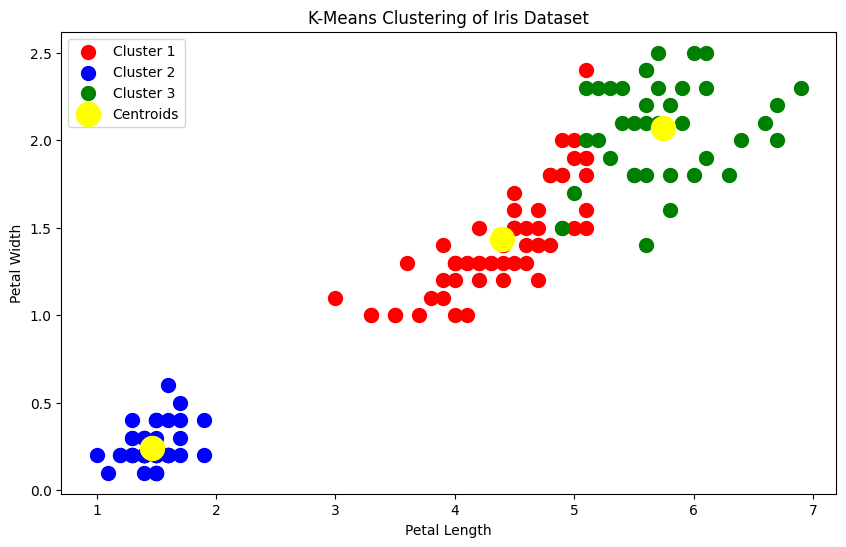

In [26]:
# Visualizing Clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='yellow', label='Centroids')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('K-Means Clustering of Iris Dataset')
plt.legend()
plt.show()

In [27]:
# Clustering Evaluation
conf_matrix = confusion_matrix(y_encoded, y_kmeans)
accuracy = accuracy_score(y_encoded, y_kmeans)

print('Confusion Matrix:')
print(conf_matrix)
print("\nAccuracy Score:", accuracy)
print(f'Accuracy: {accuracy * 100:.2f}%')

Confusion Matrix:
[[ 0 50  0]
 [48  0  2]
 [14  0 36]]

Accuracy Score: 0.24
Accuracy: 24.00%


# **Exercise 2: Choosing the Optimal Number of Clusters**

In [28]:
import numpy as np
from sklearn.metrics import silhouette_score

In [29]:
# Elbow Method
inertia = []
K = range(1, 11)
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

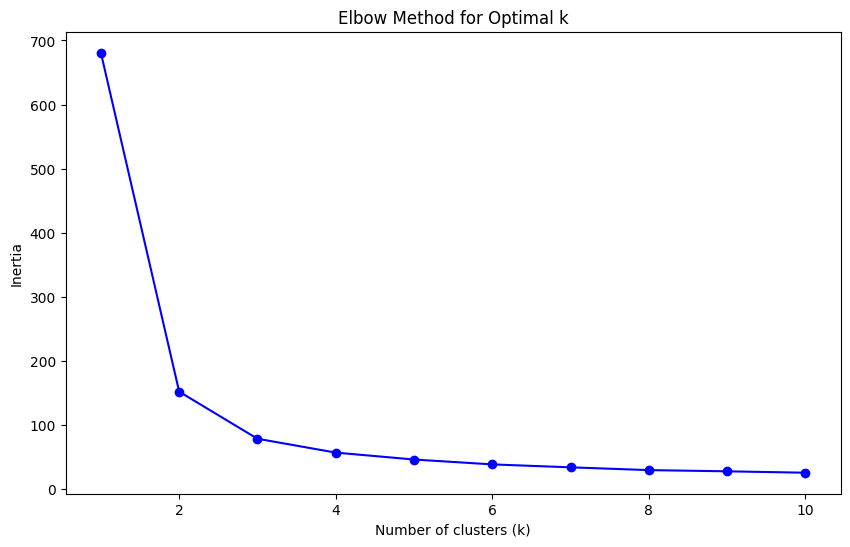

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [31]:
# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  y_kmeans = kmeans.fit_predict(X)
  silhouette_scores.append(silhouette_score(X, y_kmeans))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

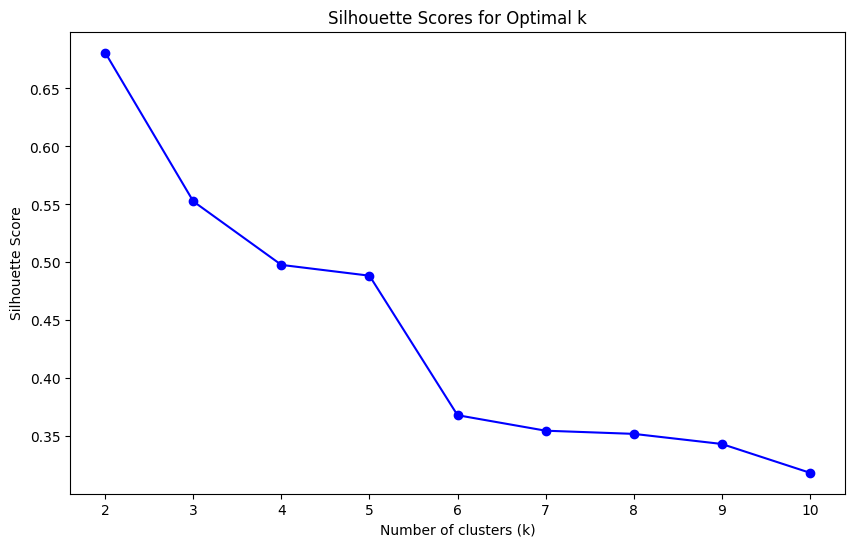

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal k')
plt.show()

# **Exercise 3: Cluster Visualization with PCA**

In [33]:
from sklearn.decomposition import PCA

In [34]:
# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [35]:
# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


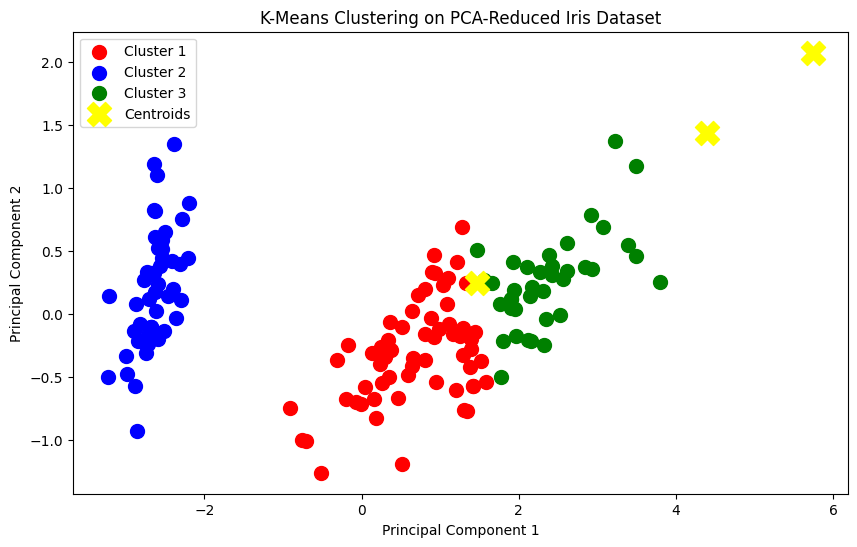

In [36]:
# Visualizing Clusters in PCA-reduced space
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='yellow', label='Centroids', marker='X')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-Reduced Iris Dataset')
plt.legend()
plt.show()

# **Exercise 4: Hierarchical Clustering: Dendrogram**

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# Compute Linkage Matrix
Z = linkage(X, method='ward')

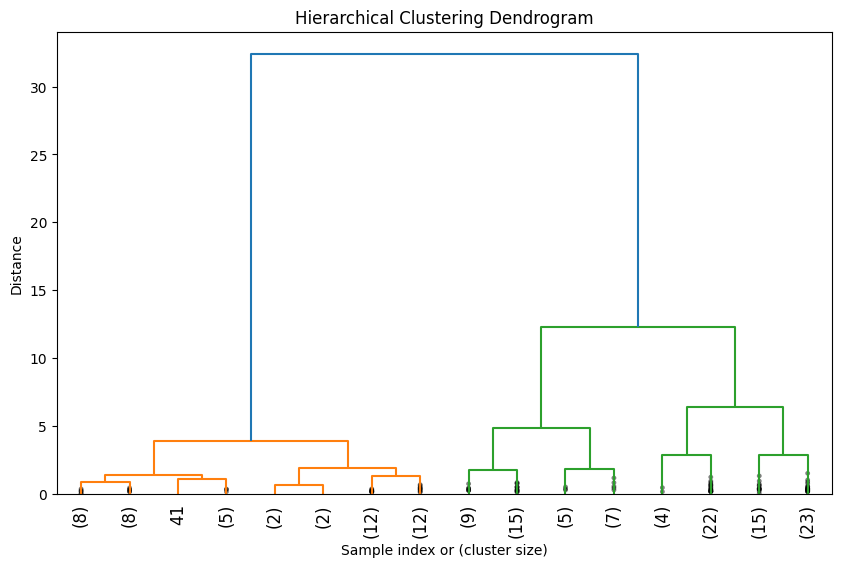

In [41]:
# Plot Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=3, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

In [42]:
max_d = 10
clusters = fcluster(Z, max_d, criterion='distance')

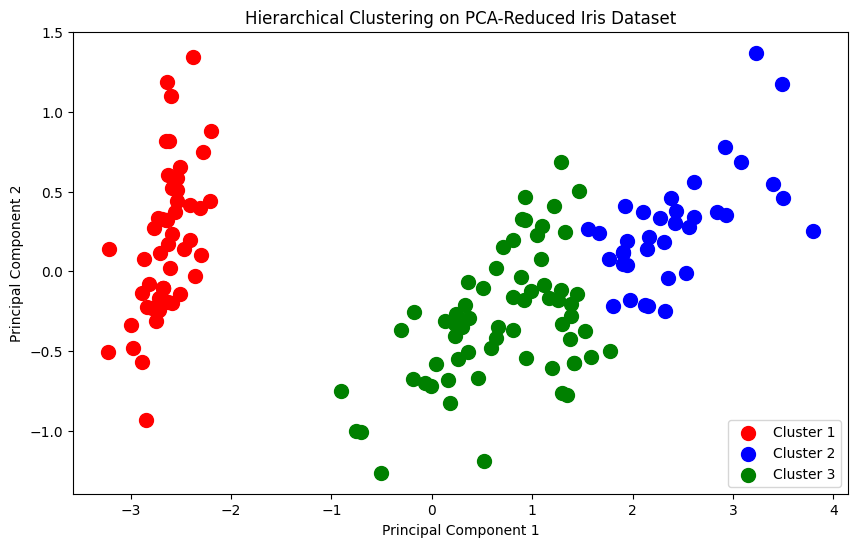

In [44]:
# Visualizing Clusters in PCA-reduced space
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[clusters == 1, 0], X_pca[clusters == 1, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_pca[clusters == 2, 0], X_pca[clusters == 2, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_pca[clusters == 3, 0], X_pca[clusters == 3, 1], s=100, c='green', label='Cluster 3')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering on PCA-Reduced Iris Dataset')
plt.legend()
plt.show()

# **Exercise 5: Comparing Clustering Algorithms**

In [45]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [46]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)
kmeans_silhouette = silhouette_score(X, y_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [47]:
# Agglomerative Hierarchical Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
y_agg = agg_cluster.fit_predict(X)
agg_silhouette = silhouette_score(X, y_agg)

In [49]:
print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"\nAgglomerative Hierarchical Clustering Silhouette Score: {agg_silhouette}")

K-Means Silhouette Score: 0.5525919445499757

Agglomerative Hierarchical Clustering Silhouette Score: 0.5540972908150553


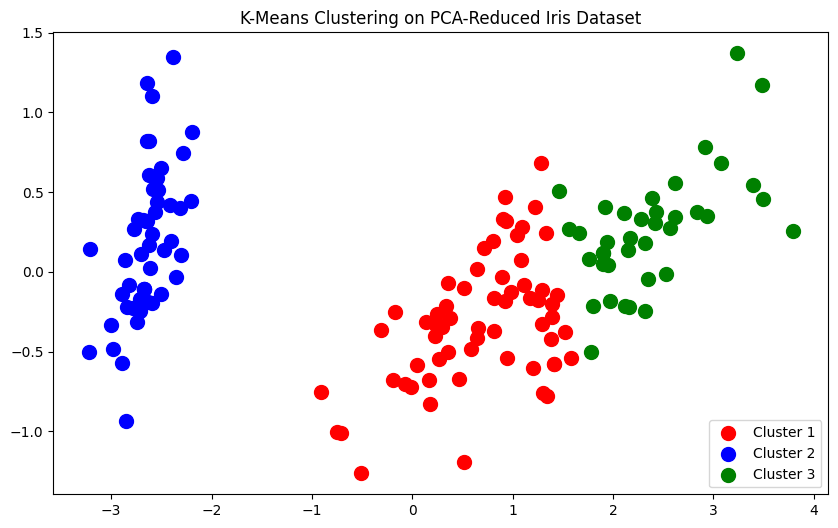

In [52]:
# K-Means Clusters in PCA-Reduced Space
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.title('K-Means Clustering on PCA-Reduced Iris Dataset')
plt.legend()
plt.show()

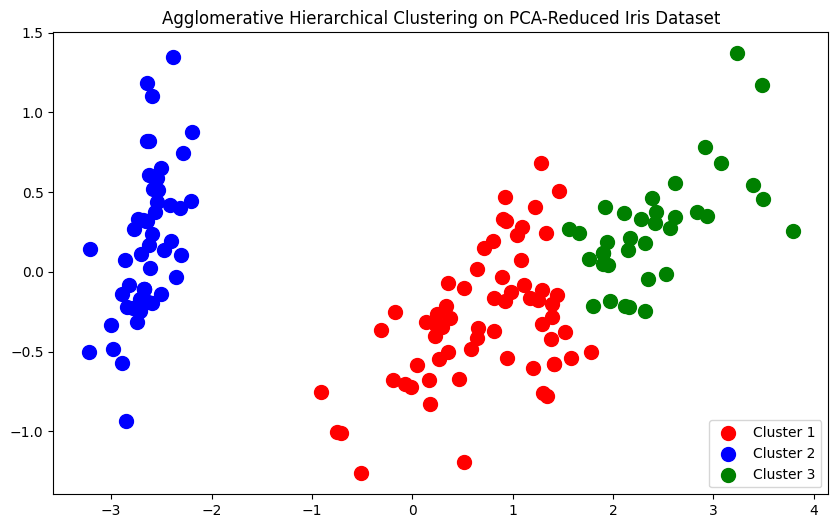

In [53]:
# Agglomerative Clusters in PCA-Reduced Space
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[y_agg == 0, 0], X_pca[y_agg == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_pca[y_agg == 1, 0], X_pca[y_agg == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_pca[y_agg == 2, 0], X_pca[y_agg == 2, 1], s=100, c='green', label='Cluster 3')
plt.title('Agglomerative Hierarchical Clustering on PCA-Reduced Iris Dataset')
plt.legend()
plt.show()